In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# to change the dataset from 4:3:3 to 6:2:2 by moving the data from one folder to another and rename the file 
import os 

def rename_file(folder,count):
    for filename in os.listdir(folder):
        dst = f"0{count}.png"
        src = f"{folder}/{filename}"
        dst = f"{folder}/{dst}"

        #rename() function will rename all the files
        os.rename(src,dst)
        count +=1

# file from validation 
rename_file(folder = "C:/Users/User/OneDrive/Desktop/Final_Year_Project/pothole600/training_val/rgb", count=240)
rename_file(folder = "C:/Users/User/OneDrive/Desktop/Final_Year_Project/pothole600/training_val/tdisp", count=240)
rename_file(folder = "C:/Users/User/OneDrive/Desktop/Final_Year_Project/pothole600/training_val/label", count=240)

# file from testing
rename_file(folder = "C:/Users/User/OneDrive/Desktop/Final_Year_Project/pothole600/training_test/rgb", count=300)
rename_file(folder = "C:/Users/User/OneDrive/Desktop/Final_Year_Project/pothole600/training_test/tdisp", count=300)
rename_file(folder = "C:/Users/User/OneDrive/Desktop/Final_Year_Project/pothole600/training_test/label", count=300)


In [3]:
train_dir = './pothole600/training/rgb/'
val_dir = './pothole600/validation/rgb/'
test_dir = './pothole600/testing/rgb/'

#target
train_tar_dir = './pothole600/training/tdisp/'
val_tar_dir = './pothole600/validation/tdisp/'
test_tar_dir = './pothole600/testing/tdisp/'

train_file = [name for name in os.listdir(train_dir) if os.path.splitext(name)[-1]=='.png']  #to make sure it is png file
val_file = [name for name in os.listdir(val_dir) if os.path.splitext(name)[-1]=='.png']
test_file = [name for name in os.listdir(test_dir) if os.path.splitext(name)[-1]=='.png']

train_tar_file = [name for name in os.listdir(train_tar_dir) if os.path.splitext(name)[-1]=='.png']  
val_tar_file = [name for name in os.listdir(val_tar_dir) if os.path.splitext(name)[-1]=='.png']  
test_tar_file = [name for name in os.listdir(test_tar_dir) if os.path.splitext(name)[-1]=='.png']  


In [4]:
train_data = torch.zeros(len(train_file),3,400,400,dtype=torch.uint8)
val_data = torch.zeros(len(val_file),3,400,400,dtype=torch.uint8)
test_data = torch.zeros(len(test_file),3,400,400,dtype=torch.uint8)

train_tar_data = torch.zeros(len(train_tar_file),3,400,400,dtype=torch.uint8)
val_tar_data = torch.zeros(len(val_tar_file),3,400,400,dtype=torch.uint8)
test_tar_data = torch.zeros(len(test_tar_file),3,400,400,dtype=torch.uint8)

In [5]:
def read_image(data,data_file,data_dir):
    for i, filename in enumerate(data_file):
        data[i] = torchvision.io.read_image(os.path.join(data_dir, filename))
    return data

train_data = read_image(train_data,train_file,train_dir)
val_data = read_image(val_data,val_file,val_dir)
test_data = read_image(test_data,test_file,test_dir)

train_tar_data = read_image(train_tar_data,train_tar_file,train_tar_dir)
val_tar_data = read_image(val_tar_data,val_tar_file,val_tar_dir)
test_tar_data = read_image(test_tar_data,test_tar_file,test_tar_dir)


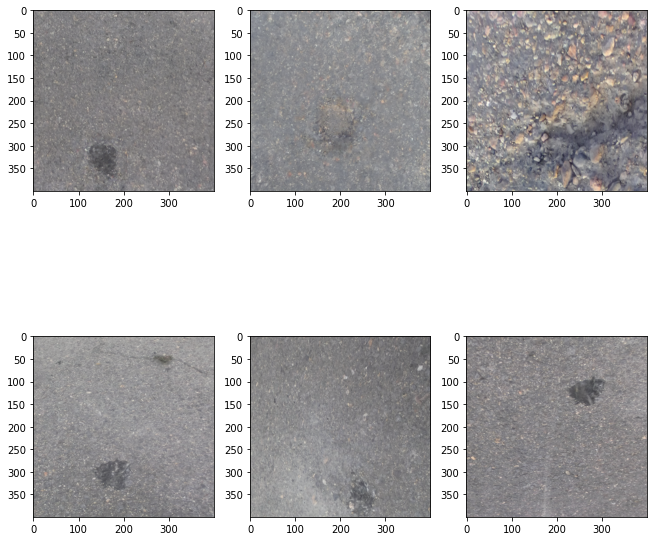

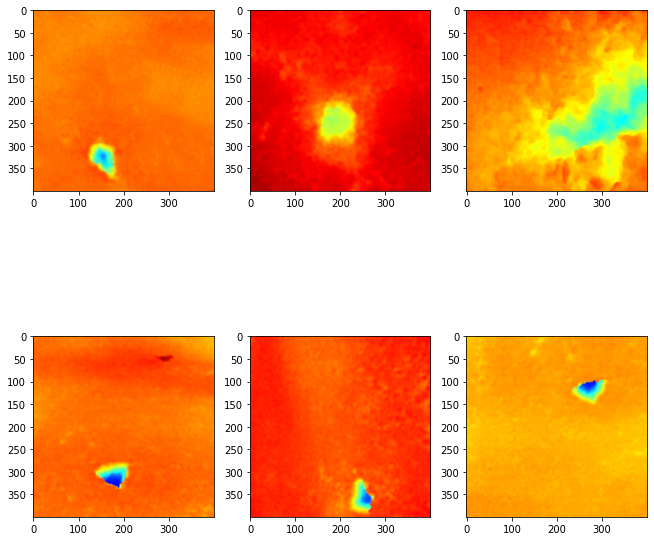

In [6]:
#visualize some training data
def visualize_data(data):
    fig = plt.figure(figsize=(11,11))
    for i in range(6):
        ax = fig.add_subplot(2,3,i+1)
        ax.imshow(data[i].permute(1,2,0))
visualize_data(train_data)
visualize_data(train_tar_data)

In [7]:
# normalize the data
def normalize(data):
    data = data.float()
    n_images = data.shape[1]

    for c in range(n_images):
        print(c)
        mean = torch.mean(data[:,c])
        std = torch.std(data[:,c])
        data[:,c] = (data[:,c] - mean)/std
    return data

# train_data = normalize(train_data)
# val_data = normalize(train_data)
# test_data = normalize(train_data)